

# Project: Investigate a Dataset (Movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter


% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# storing the file to tmdb_movies
tmdb_data = pd.read_csv('tmdb-movies.csv')
#show the first three rows:
print(f"Number of movies in tmdb movies dataset: {tmdb_data.shape}")
tmdb_data.head(3)

Number of movies in tmdb movies dataset: (10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08


In [3]:
tmdb_data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [4]:
#Check if there are null in columns and by how much
pt = ((tmdb_data.isnull().sum() / tmdb_data.shape[0])*100).sort_values(ascending = False)
tl = tmdb_data.isnull().sum().sort_values(ascending = False)
pd.concat([tl,pt],axis = 1, keys = ['total','percent'])

,total,percent
homepage,7930,72.979937
tagline,2824,25.989324
keywords,1493,13.740107
production_companies,1030,9.479109
cast,76,0.699429
director,44,0.404933
genres,23,0.211669
imdb_id,10,0.092030
overview,4,0.036812
popularity,0,0.000000


# Cleaning

#### Cleaning is a very important part of looking at data. This helps make sure that our charts and graphs work appropriatley and that we are not using null data. I will be doing the following:
#### Removing Duplicates
#### Removing columns I am not using
#### Removing Duplicates
#### Removing null values
#### Change budget and revenue to integers
#### Removing Duplicates
#### Change release date to datetime

In [5]:
##Checking for Duplicates
tmdb_data.duplicated().sum()

1

In [6]:
##Removing duplicates
tmdb_data.drop_duplicates(inplace = True)

In [7]:
##Verifying that duplicates are indeed removed
tmdb_data.duplicated().sum()

0

In [8]:
##Removing extra columns I do not need
#make a variable that has all the name of the columns to be removed
drop_col = ['imdb_id','homepage','keywords','tagline','overview']
#removes all the columns with the drop function
tmdb_data = tmdb_data.drop(drop_col,1)

In [9]:
#Change 0 to null(nan)
#checks the total number of null values in each columns
tmdb_data.isnull().sum()


id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
#replace the 0 with null values
tmdb_data.revenue.replace(0,np.NAN, inplace=True)
tmdb_data.budget.replace(0,np.NAN, inplace=True)
tmdb_data.runtime.replace(0,np.NAN, inplace=True)
tmdb_data.budget_adj.replace(0,np.NAN, inplace=True)
tmdb_data.revenue_adj.replace(0,np.NAN, inplace=True)

In [11]:
#drop all the null values
tmdb_data.dropna(inplace=True)

In [12]:
#converts the budget to int type and print first 5 rows
tmdb_data.budget.astype(int, inplace=True).head()

0    150000000
1    150000000
2    110000000
3    200000000
4    190000000
Name: budget, dtype: int64

In [13]:
#converts the revenue to int type and print first 5 rows
tmdb_data.revenue.astype(int, inplace=True).head(5)

0    1513528810
1     378436354
2     295238201
3    2068178225
4    1506249360
Name: revenue, dtype: int64

In [14]:
#converts the release_date to datetime
tmdb_data.release_date = pd.to_datetime(tmdb_data.release_date)

In [15]:
#Convert columns to Uppercase to visualize
#tmdb_data.columns = tmdb_data.columns.str.upper()
#tmdb_data.columns
#tmdb_data.head()

<a id='eda'></a>
## Exploratory Data Analysis


# Q1 - What is the relation of release year and revenue within the data?

In [16]:
#defined a variable with to find the minimum
min_release_year = tmdb_data.release_year.min()
#prints the row with minimum value
tmdb_data.query('release_year==@min_release_year')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10141,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,109.0,Drama|Horror|Thriller,Shamley Productions,1960-08-14,1180,8.0,1960,5.949601e+06,2.359350e+08
10142,966,1.872132,2000000.0,4905000.0,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,128.0,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,1960-10-23,224,7.0,1960,1.474593e+07,3.616441e+07
10143,967,1.136943,12000000.0,60000000.0,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,197.0,Action|Drama|History,Bryna Productions,1960-10-06,211,6.9,1960,8.847561e+07,4.423780e+08
10144,284,0.947307,3000000.0,25000000.0,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,125.0,Comedy|Drama|Romance,United Artists|The Mirisch Company,1960-06-15,235,7.9,1960,2.211890e+07,1.843242e+08
10170,18973,0.055821,3000000.0,7100000.0,Cinderfella,Jerry Lewis|Ed Wynn|Judith Anderson|Henry Silv...,Frank Tashlin,91.0,Comedy|Romance,Paramount Pictures|Jerry Lewis Productions,1960-12-18,13,7.2,1960,2.211890e+07,5.234807e+07


### The data shows that the earliest movies we have in the data are from 1960

In [17]:
#defined a variable with to find the maximum
max_release_year = tmdb_data.release_year.max()
#prints the row with maximum value
tmdb_data.query('release_year==@max_release_year')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156.0,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125.0,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91.0,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94.0,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08


### The data shows that the latest movies we have in the data are from 2015

In [18]:
#defined a variable with to find the minimum
min_revenue = tmdb_data.revenue.min()
#prints the row with minimum value
tmdb_data.query('revenue==@min_revenue')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5067,13537,0.462609,6000000.0,2.0,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,94.0,Drama|History,Lions Gate Films|Cruise/Wagner Productions|Bau...,2003-11-14,46,6.4,2003,7112115.869,2.370705
8142,2293,0.552091,6000000.0,2.0,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,94.0,Romance|Comedy,Gramercy Pictures|Alphaville Films|View Askew ...,1995-10-20,201,6.8,1995,8585801.203,2.861934


### The data shows that the minimum amount of revenue is 2.0

In [19]:
#defined a variable with to find the maximum
max_revenue = tmdb_data.revenue.max()
#prints the row with maximum value
tmdb_data.query('revenue==@max_revenue')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,240886902.9,2.827124e+09


#### Bar graph to represent the data we have collected so far:

Text(0,0.5,'Revenue per $1 million')

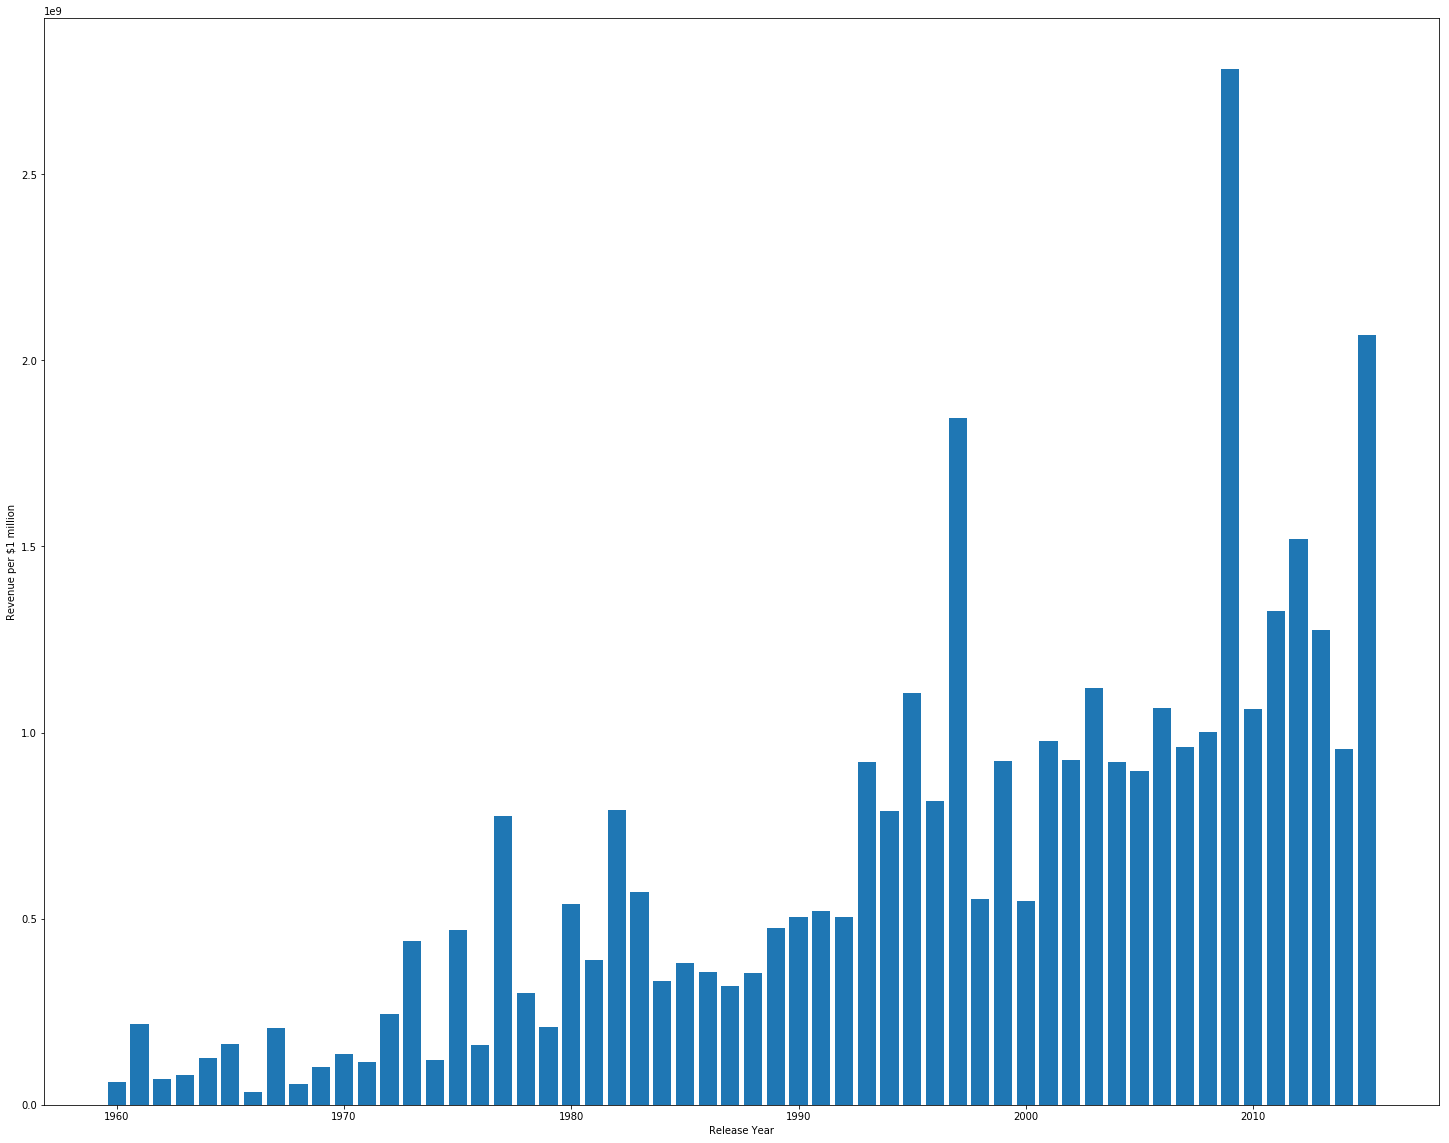

In [20]:
plt.rcParams["figure.figsize"] = (25,20)
#add the x axis
x = tmdb_data.release_year
#add the y axis
y = tmdb_data.revenue
#plot the bar graph
plt.bar(x,y)
#Add labels
plt.xlabel('Release Year')
plt.ylabel('Revenue per $1 million')

#### This bar graph does show a trend in higher revenue as the years increase.

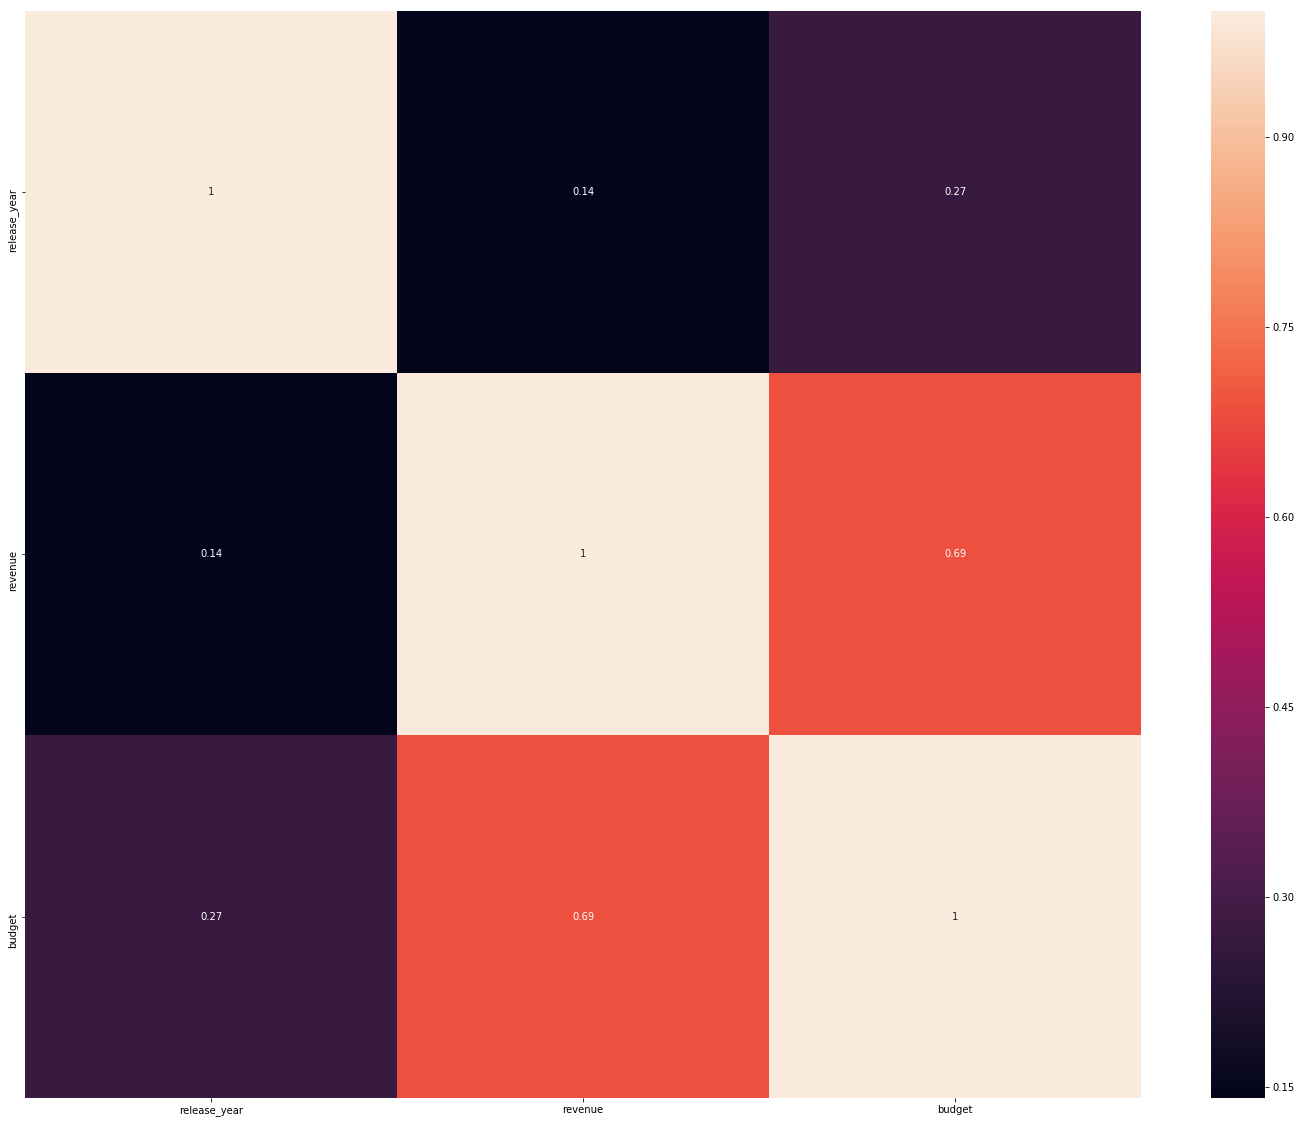

In [21]:
df = pd.DataFrame(tmdb_data,columns=['release_year','revenue','budget'])

corrMatrix = df.corr()
sb.heatmap(corrMatrix, annot=True)
plt.show()

#### The correlation matrix above has the variables release year, revenue and budget. The matrix shows that there is a higher correlation between revenue and budget than revenue and years.

# Q2 - Does who the director is matter when it comes to movies and their revenue?


,mean,std
director,,
Clint Eastwood,1.153859e+08,1.120811e+08
Martin Scorsese,1.157014e+08,1.208584e+08
Ridley Scott,1.706872e+08,1.719192e+08
Steven Spielberg,3.340209e+08,2.312726e+08
Woody Allen,4.154744e+07,4.168138e+07


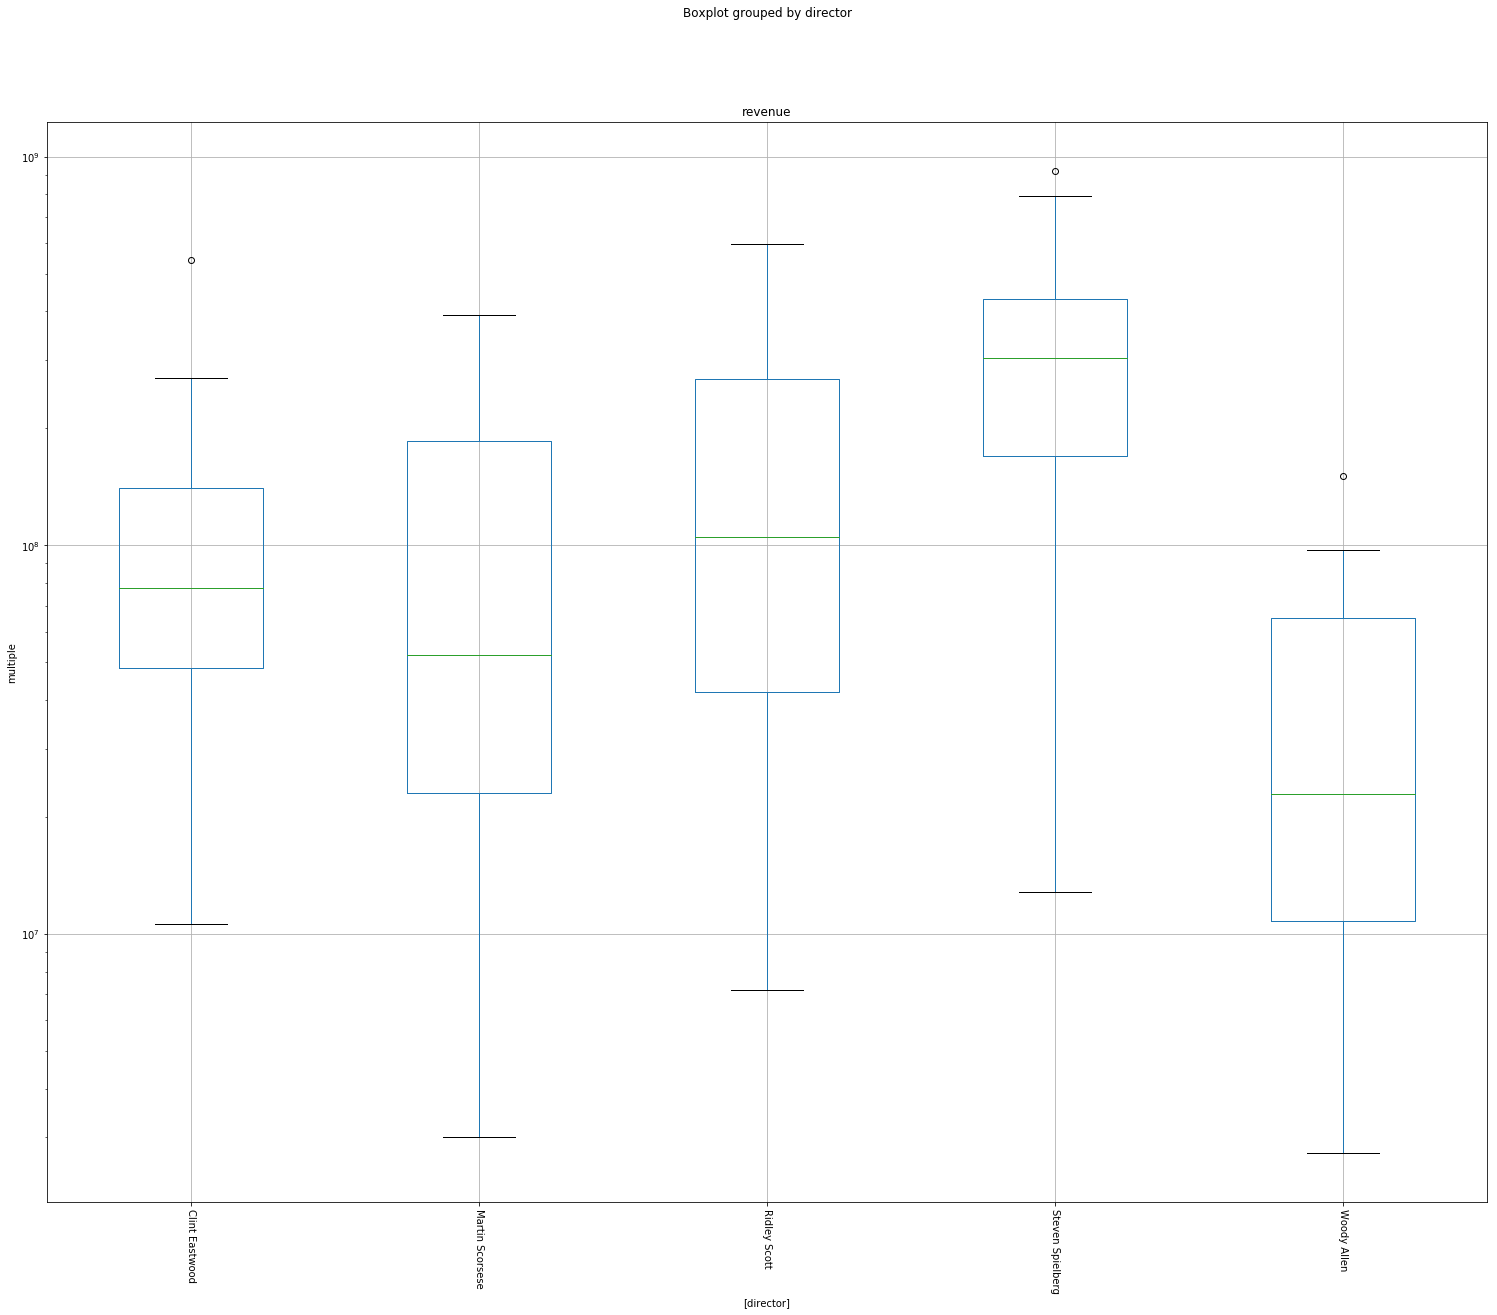

In [25]:
boxplot=tmdb_data.groupby(['director'])[['id']].count().sort_values(by=['id'], ascending=False)[0:5]
boxplot_new = tmdb_data[tmdb_data['director'].isin(boxplot.index.values.tolist())]
#remove any revenue that is 0 or less
boxplot_new1=boxplot_new[boxplot_new['revenue']>0]
boxplot_new1.boxplot(column=['revenue'], by = ['director'], rot=270).set_yscale('log')
#add y label
plt.ylabel("multiple")
pd.DataFrame(boxplot_new1.groupby(['director'])['revenue'].describe().loc[:,['mean','std']])

### This box plot shows relationship between a categorical feature (Directors) and a continuous feature (multiple).

<a id='conclusions'></a>
## Conclusions

In conclusion we can tell that the first chart for question 1 shows us there is an upward trend. From 1960-2015 there has been an upward trend in revenue. A few years have gone below that trend line but most have been going upward. The matrix however shows a higher correlation between budget and revenue.

For our second question we are asking whether revenue is determined by director. I believe this question may be hard or impossible to answer with this limited data. I can however comment that it seems Stephen Spielberg has a greater chance of having a high revenue than the other 4 directors in the list.

### Limitations

1.The only dataset we used was from TMBD Movies which only provided a sample of the movies throughout the U.S.A. This dataset does not include every director and it only goes through 2015.

2.Values that were null were dropped from their respected variables. This could have unbalanced the data.

3.Revenues and budgets were not confirmed or verified. As such there may have been currency rates that were different and need to be converted.

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0